Importing Libraries for Data Analysis, Data Visualization and Machine learning tasks

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import glob as gb
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from statsmodels.tsa.seasonal import STL
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
warnings.filterwarnings('ignore')

Data Loading - Loading the weather data

In [2]:
#Loading and pre processing the data
path = r"C:\Users\ASUS\Desktop\Datascience_reassessment\weatherdata_for_students\*.csv"
filenames = gb.glob(path)
filenames

['C:\\Users\\ASUS\\Desktop\\Datascience_reassessment\\weatherdata_for_students\\brighton_001.csv',
 'C:\\Users\\ASUS\\Desktop\\Datascience_reassessment\\weatherdata_for_students\\brighton_002.csv',
 'C:\\Users\\ASUS\\Desktop\\Datascience_reassessment\\weatherdata_for_students\\brighton_003.csv',
 'C:\\Users\\ASUS\\Desktop\\Datascience_reassessment\\weatherdata_for_students\\brighton_004.csv',
 'C:\\Users\\ASUS\\Desktop\\Datascience_reassessment\\weatherdata_for_students\\brighton_005.csv',
 'C:\\Users\\ASUS\\Desktop\\Datascience_reassessment\\weatherdata_for_students\\brighton_006.csv',
 'C:\\Users\\ASUS\\Desktop\\Datascience_reassessment\\weatherdata_for_students\\brighton_007.csv',
 'C:\\Users\\ASUS\\Desktop\\Datascience_reassessment\\weatherdata_for_students\\brighton_008.csv',
 'C:\\Users\\ASUS\\Desktop\\Datascience_reassessment\\weatherdata_for_students\\brighton_009.csv',
 'C:\\Users\\ASUS\\Desktop\\Datascience_reassessment\\weatherdata_for_students\\brighton_010.csv',
 'C:\\User

Merging all the data frames into a single data frame

In [3]:
# Initialize an empty list to store dataframes
dfs = []

# Loop through each file in the list of filenames
for filename in filenames:
    # Check if the first row contains "datetime" column
    if "datetime" not in pd.read_csv(filename, nrows=1).columns:
        # File has different column names, so we skip the first row
        df = pd.read_csv(filename, skiprows=1)
    else:
        # File has standard column names, read normally
        df = pd.read_csv(filename)

    # Append the dataframe to the list
    dfs.append(df)

# Merge all the loaded dataframes into one dataframe
merged_df = pd.concat(dfs)



Data Preprocessing - Here the data is being cleaned and prepared for the analysis and modelling

1. Handeling missing values - This involves identifying missing values in the dataset, and the missing values are handeled using Interpolation which involves predicting the values of unknown data points based on the values of known data points.  

In [4]:
#Calculate the number of missing values
for columns in merged_df:
    print("Null values in", columns,"=", merged_df[columns].isnull().sum())

Null values in datetime = 0
Null values in temp = 254
Null values in dew = 276
Null values in humidity = 269
Null values in precip = 279
Null values in precipprob = 286
Null values in preciptype = 111567
Null values in snow = 33034
Null values in snowdepth = 33565
Null values in windspeed = 261
Null values in winddir = 277
Null values in sealevelpressure = 525
Null values in cloudcover = 288
Null values in solarradiation = 330
Null values in solarenergy = 364
Null values in uvindex = 358


In [5]:
# Interpolate null values using linear interpolation
merged_df = merged_df.interpolate(method='linear')


# Perform label encoding for "preciptype" column
label_encoder = LabelEncoder()
merged_df['preciptype'] = label_encoder.fit_transform(merged_df['preciptype'])


In [6]:
#After Interpolation, calculating the number of missing values
for columns in merged_df:
    print("Null values in", columns,"=", merged_df[columns].isnull().sum())

Null values in datetime = 0
Null values in temp = 0
Null values in dew = 0
Null values in humidity = 0
Null values in precip = 0
Null values in precipprob = 0
Null values in preciptype = 0
Null values in snow = 0
Null values in snowdepth = 0
Null values in windspeed = 0
Null values in winddir = 0
Null values in sealevelpressure = 0
Null values in cloudcover = 0
Null values in solarradiation = 0
Null values in solarenergy = 0
Null values in uvindex = 0


2. Correcting Data types - It is to ensure that the data is represented in a format suitable for analysis or modeling.

In [7]:
print(df.dtypes)

datetime             object
temp                float64
dew                 float64
humidity            float64
precip              float64
precipprob          float64
preciptype           object
snow                float64
snowdepth           float64
windspeed           float64
winddir             float64
sealevelpressure    float64
cloudcover          float64
solarradiation        int64
solarenergy         float64
uvindex             float64
dtype: object


In [8]:
# Convert 'datetime' column to datetime data type
merged_df['datetime'] = pd.to_datetime(merged_df['datetime'])

# Extract year, month, day, and time components into separate columns
merged_df['year'] = merged_df['datetime'].dt.year
merged_df['month'] = merged_df['datetime'].dt.month
merged_df['day'] = merged_df['datetime'].dt.day


The descriptive statistics that summarize the central tendency, dispersion, and shape of a dataset's distribution : -

In [9]:
merged_df.describe()

,datetime,temp,dew,humidity,precip,precipprob,preciptype,snow,snowdepth,windspeed,winddir,sealevelpressure,cloudcover,solarradiation,solarenergy,uvindex,year,month,day
count,122844,122844.000000,122844.000000,122844.000000,122844.000000,122844.000000,122844.000000,122844.000000,122844.000000,122844.000000,122844.000000,122844.000000,122844.000000,122844.000000,122844.000000,122844.000000,122844.000000,122844.000000,122844.000000
mean,2017-01-03 06:05:12.103155200,11.058973,8.049020,82.879081,0.081929,8.880776,2.727891,0.000307,6.756476,15.938373,196.540890,1015.529981,60.839920,138.674568,0.498811,1.369424,2016.507766,6.518235,15.715013
min,2010-01-01 00:00:00,-9.100000,-11.600000,24.340000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.700000,955.000000,0.000000,0.000000,0.000000,0.000000,2010.000000,1.000000,1.000000
25%,2013-07-03 15:45:00,7.200000,4.500000,75.550000,0.000000,0.000000,3.000000,0.000000,0.000000,9.400000,113.000000,1009.600000,36.000000,0.000000,0.000000,0.000000,2013.000000,4.000000,8.000000
50%,2017-01-03 05:30:00,11.000000,8.400000,85.700000,0.000000,0.000000,3.000000,0.000000,0.000000,14.400000,223.000000,1016.400000,68.400000,9.000000,0.000000,0.000000,2017.000000,7.000000,16.000000
75%,2020-07-05 21:15:00,15.300000,12.000000,92.790000,0.000000,0.000000,3.000000,0.000000,0.000000,21.300000,267.000000,1022.500000,89.700000,201.000000,0.700000,2.000000,2020.000000,10.000000,23.000000
max,2024-01-06 11:00:00,33.300000,20.200000,100.000000,32.385000,100.000000,3.000000,7.870000,96.000000,72.200000,360.000000,1049.300000,100.000000,1150.000000,4.100000,10.000000,2024.000000,12.000000,31.000000
std,NaN,5.654158,5.135385,12.510019,0.660289,28.431336,0.858022,0.029681,18.860649,8.902632,106.261071,10.518358,31.874005,220.761035,0.795466,2.225441,4.036078,3.451485,8.804550


Data Visualization :-

1. Time series plot - This plot depicts the temperature changing over time. As we can see in the plot, the peak rise of temperature is during the day and drop is during the night.

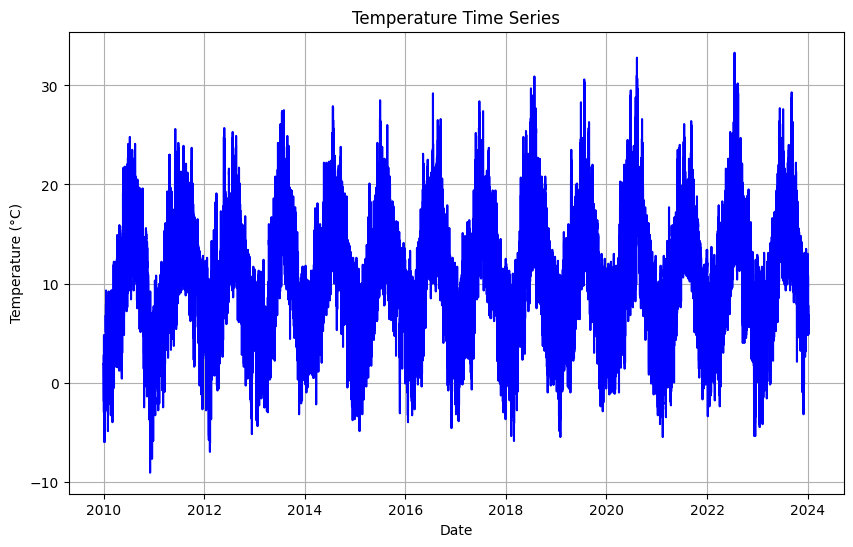

In [10]:
# Convert the date column to datetime format
timeSeries_data = merged_df.copy()

timeSeries_data['datetime'] = pd.to_datetime(timeSeries_data['datetime'])

# Set the datetime column as the index of the DataFrame
timeSeries_data.set_index('datetime', inplace=True)

# Plot the temperature data as a time series
plt.figure(figsize=(10, 6))
plt.plot(timeSeries_data.index, timeSeries_data['temp'], color='blue', linestyle='-')
plt.title('Temperature Time Series')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.grid(True)
plt.show()

2. Histogram - This graph depicts the freequency with respect to the solar energy and solar radiation

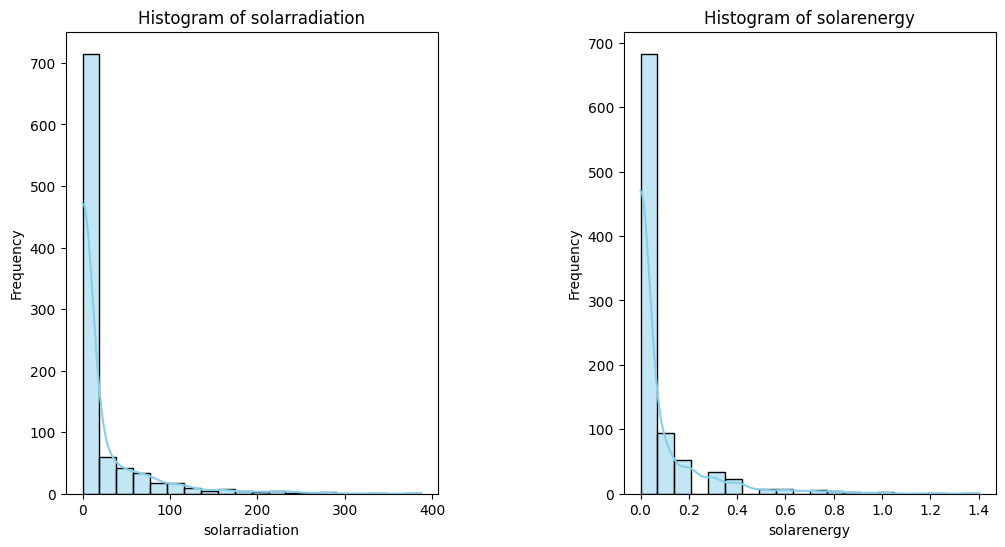

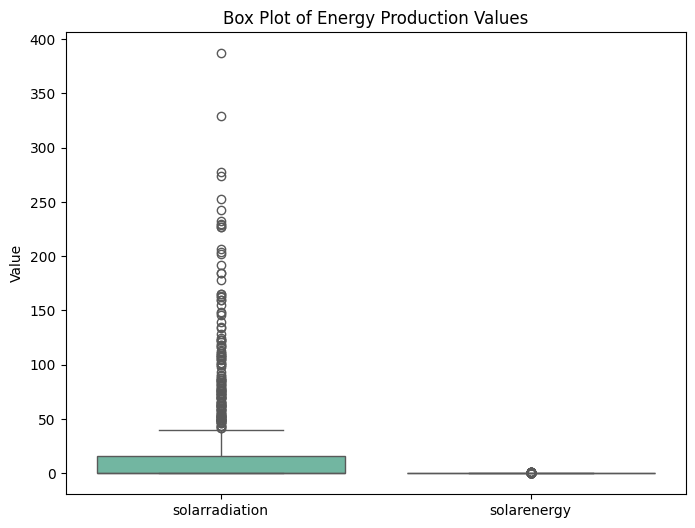

In [11]:
# Plot histograms for energy production values
plt.figure(figsize=(12, 6))
plt.subplots_adjust(wspace=0.5)

for i, column in enumerate(['solarradiation', 'solarenergy'], start=1):
    plt.subplot(1, 2, i)
    sns.histplot(df[column], kde=True, color='skyblue', bins=20)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.show()

# Plot box plots for energy production values
plt.figure(figsize=(8, 6))
sns.boxplot(data=df[['solarradiation', 'solarenergy']], palette='Set2')
plt.title('Box Plot of Energy Production Values')
plt.ylabel('Value')
plt.xticks(ticks=[0, 1], labels=['solarradiation', 'solarenergy'])
plt.show()

3. Correlation matrix - It is a table showing correlation coefficients between variables. Each cell in the table represents the correlation between two variables. The value of correlation coefficient ranges from -1 to 1, indicating the strength and direction of the relationship between variables.

    When the correlation coefficient between two variables is 1, it indicates a perfect positive linear relationship between the variables.

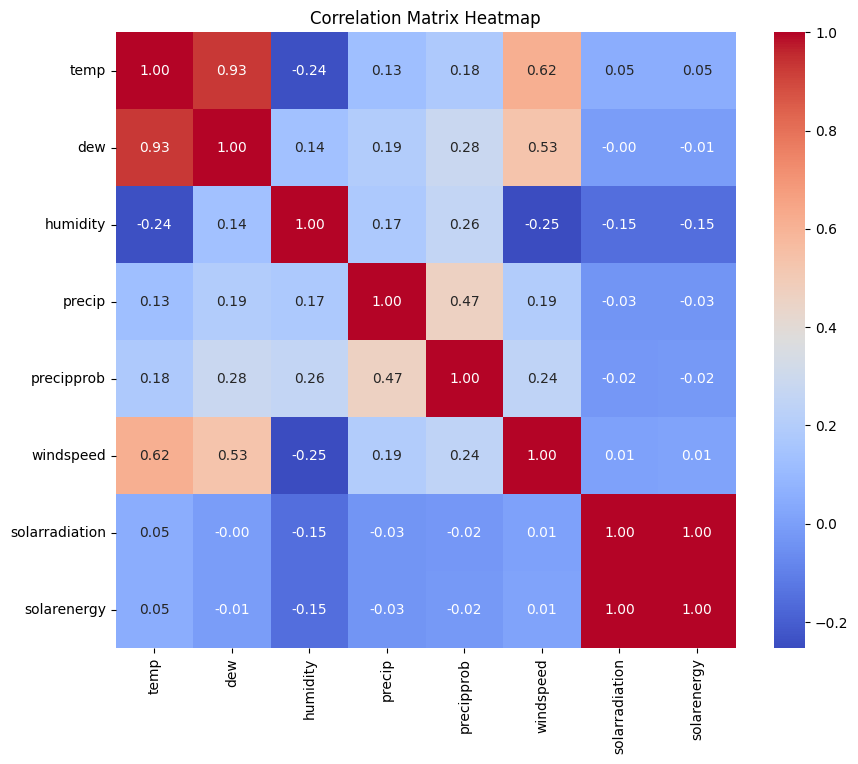

In [12]:
#Correlation matrix
selected_columns = ['temp', 'dew', 'humidity', 'precip', 'precipprob', 'windspeed', 
                    'solarradiation', 'solarenergy']

# Calculate correlation matrix
correlation_matrix = df[selected_columns].corr()

# Create heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Matrix Heatmap')
plt.show()

4. Seasonality - These are patterns that occur at regular intervals or seasons within the data. These patterns repeat over fixed periods, such as days, weeks, months, or years

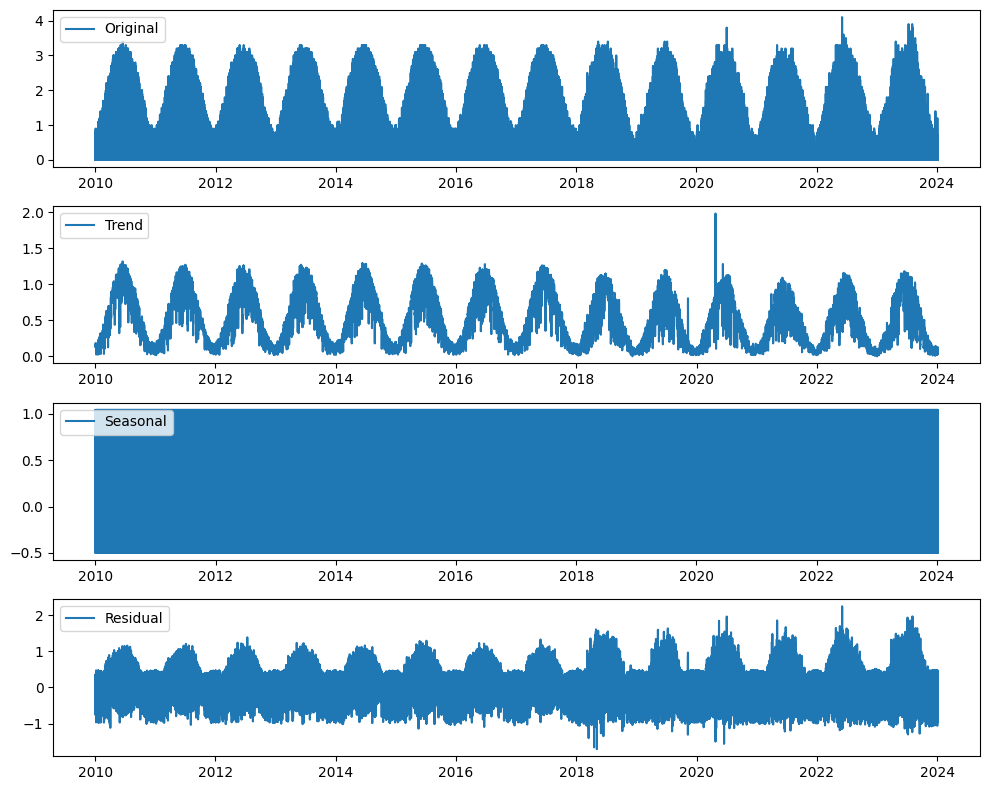

In [13]:
seasonal_df = merged_df.copy()
# Convert the 'datetime' column to datetime format
seasonal_df['datetime'] = pd.to_datetime(seasonal_df['datetime'])

# Set the datetime column as the index
seasonal_df.set_index('datetime', inplace=True)

# Resample the DataFrame to hourly frequency
seasonal_df = seasonal_df.resample('H').mean()  # or use .sum() or .interpolate() depending on your data

# Handle missing values in the time series
seasonal_df['solarenergy'].fillna(method='ffill', inplace=True)  # Forward fill missing values

# Choose 'solarenergy' column for decomposition
timeseries = seasonal_df['solarenergy']

# Perform seasonal decomposition
decomposition = seasonal_decompose(timeseries, model='additive')

# Plot the decomposition
plt.figure(figsize=(10, 8))
plt.subplot(411)
plt.plot(timeseries, label='Original')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(decomposition.trend, label='Trend')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonal')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(decomposition.resid, label='Residual')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

Methodology (Feature engineering)

In [14]:
#Calculating wind energy

def power_curve(wind_speed):

    return wind_speed ** 3  # Cubic relationship for simplicity

# Convert wind speed and direction to vector components
def calculate_wind_components(wind_speed, wind_direction):
    wind_speed_x = wind_speed * np.cos(np.radians(wind_direction))
    wind_speed_y = wind_speed * np.sin(np.radians(wind_direction))
    return wind_speed_x, wind_speed_y

# Function to calculate wind energy for each row
def calculate_wind_energy(row):
    # Extract wind speed and direction from the row
    wind_speed = row['windspeed'] 
    wind_direction = row['winddir']  
    
    # Calculate wind speed components
    wind_speed_x, wind_speed_y = calculate_wind_components(wind_speed, wind_direction)
    
    # Calculate power output using power curve
    power_output = power_curve(wind_speed)
    

    time_period_hours = 1 
    wind_energy = power_output * time_period_hours  
    
    return wind_energy

merged_df['wind_energy_generation'] = merged_df.apply(calculate_wind_energy, axis=1)


In [15]:
#Calculating solar energy generation

merged_df['solar_panel_efficiency'] = merged_df['solarenergy'] / merged_df['solarradiation']


def calculate_solar_energy_generation(row):
    
    solar_radiation = row['solarradiation']  

    solar_energy_generation = row['solar_panel_efficiency'] * solar_radiation
    
    return solar_energy_generation


merged_df['solar_energy_generation'] = merged_df.apply(calculate_solar_energy_generation, axis=1)

merged_df.fillna(0, inplace=True)

Scatter Plot :-

Analysing the data using scatter plot with the newly generated values of wind energy generation and the solar energy generation. 

The wind energy generation depicts an Exponential curve which means that the value on the y-axis changes more rapidly in relation to the value on the x-axis.

The solar energy generation plot depicts a single positive correlation which means there is no direction observed if the value of one of the variables stays more or less the same and the other variable is changing.

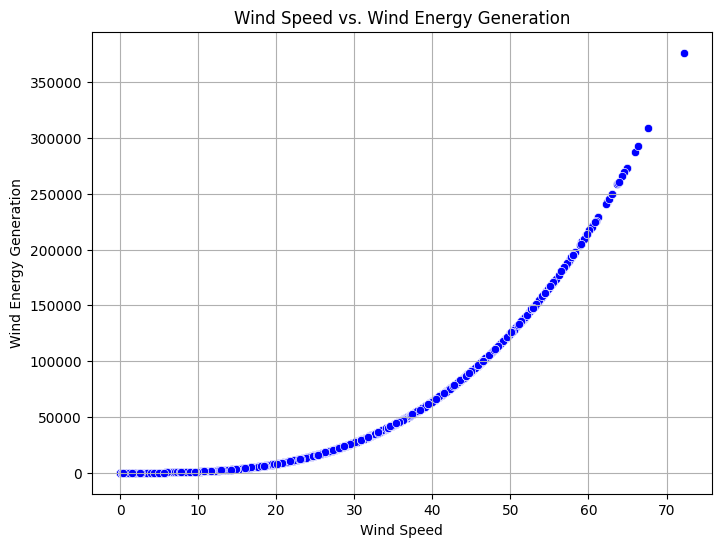

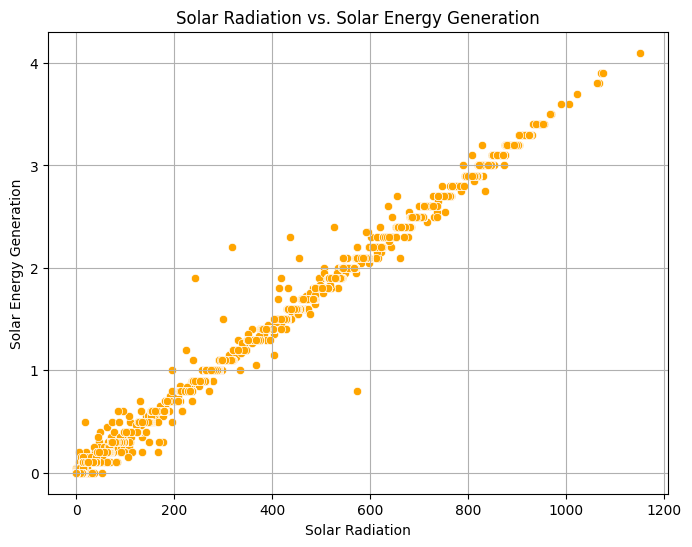

In [16]:
# Scatter plot for Wind Speed vs. Wind Energy Production
plt.figure(figsize=(8, 6))
sns.scatterplot(x='windspeed', y='wind_energy_generation', data=merged_df, color='blue')
plt.title('Wind Speed vs. Wind Energy Generation')
plt.xlabel('Wind Speed')
plt.ylabel('Wind Energy Generation')
plt.grid(True)
plt.show()

# Scatter plot for Solar Radiation vs. Solar Energy Production
plt.figure(figsize=(8, 6))
sns.scatterplot(x='solarradiation', y='solar_energy_generation', data=merged_df, color='orange')
plt.title('Solar Radiation vs. Solar Energy Generation')
plt.xlabel('Solar Radiation')
plt.ylabel('Solar Energy Generation')
plt.grid(True)
plt.show()

Assumptions - Here we have assumed 2 variables and given them a value based on the data to calculate the total renewable energy

In [17]:
#Calculating total renewable energy
#Assumptions
wind_mill_num = 10
solar_panel_num = 10

merged_df['total_renewable_energy'] =  wind_mill_num * merged_df['wind_energy_generation'] + solar_panel_num * merged_df['solar_energy_generation']


Finding the energy consumption based on the number of houses

In [18]:
def calculating_consmuption(row):
    number_houses = round(118953 * 0.1)
    avg_hourly_consumption = 2700/(365*24)
    k = np.random.randint(2, 11)
    return   number_houses * avg_hourly_consumption * k

In [19]:
merged_df['consumption'] = merged_df.apply(calculating_consmuption, axis=1)

In [20]:
#Surplus being 1 and deficit being 0

def replace_with_binary(value):
    if value > 0:
        return 1
    else:
        return 0
merged_df['surplus_status'] = merged_df['total_renewable_energy'] - merged_df['consumption']
merged_df.drop(columns=['consumption'], inplace=True)
merged_df['surplus_status'] = merged_df['surplus_status'].apply(lambda x: replace_with_binary(x))

In [21]:
merged_df['surplus_status'] = merged_df['surplus_status'].shift(-24)

In [22]:
merged_df.isna().sum()

datetime                    0
temp                        0
dew                         0
humidity                    0
precip                      0
precipprob                  0
preciptype                  0
snow                        0
snowdepth                   0
windspeed                   0
winddir                     0
sealevelpressure            0
cloudcover                  0
solarradiation              0
solarenergy                 0
uvindex                     0
year                        0
month                       0
day                         0
wind_energy_generation      0
solar_panel_efficiency      0
solar_energy_generation     0
total_renewable_energy      0
surplus_status             24
dtype: int64

In [23]:
value_counts = merged_df['surplus_status'].value_counts()

# Print the counts for each category
print(value_counts)

surplus_status
1.0    71946
0.0    50874
Name: count, dtype: int64


In [24]:
merged_df.dropna(inplace= True)

Dropping the columns that are not relevant for the model building

In [25]:
merged_df.drop(columns=['datetime','dew','solarenergy','wind_energy_generation','solar_panel_efficiency','total_renewable_energy'], inplace=True)
merged_df.dropna(inplace= True)

In [26]:
merged_df.to_csv("final_dataframe.csv", index=False)